In [1]:
import pandas as pd
import numpy as np
from scipy import stats


# 데이터프레임 생성


In [3]:
df = pd.read_excel("C:\\Users\\user\\Desktop\\논문\\key paper\\mouseTracker_data\\Dataset.xlsx")
df = df.replace(['faker','honest'], ['1','2'])
df.head()

,Subject number,S T-score,S_RT,S_MD,S_AUC,S_MD_time,S_vel X,S_vel Y,K T-score,K_RT,...,L_vel Y,VR T-score,VR_RT,VR_MD,VR_AUC,VR_MD_time,VR_vel X,VR_vel Y,Time Pressure,Instructions
0,1,63,4545.84,0.259576,0.303910,3011.18,0.002130,0.012885,63,4766.233333,...,0.012966,75,6123.384615,0.187931,1.486869,4306.615385,-0.001035,0.001359,no,1
1,1,58,7525.48,0.377188,0.638836,4857.54,0.001607,0.012960,49,7495.333333,...,0.012939,63,6643.384615,0.266700,1.037800,4349.076923,0.001053,-0.000190,no,2
2,2,74,3336.54,0.246824,0.289516,1917.46,0.004454,0.013076,67,4091.800000,...,0.012955,58,4162.769231,0.236738,0.829969,2887.000000,-0.000658,0.000440,no,1
3,2,48,4963.36,0.198160,0.298706,3756.72,0.000466,0.013023,61,4681.066667,...,0.013012,33,4211.923077,0.103285,0.038762,3195.769231,-0.000164,-0.000011,no,2
4,3,53,6662.22,0.634838,1.303980,3747.08,0.001149,0.012950,61,10016.333333,...,0.012598,63,5521.384615,0.367577,14.320600,2289.076923,0.000237,-0.001548,no,1


In [9]:
df = df.drop(['Time Pressure'],axis=1)

In [10]:
df

,S T-score,S_RT,S_MD,S_AUC,S_MD_time,S_vel X,S_vel Y,K T-score,K_RT,K_MD,...,L_vel X,L_vel Y,VR T-score,VR_RT,VR_MD,VR_AUC,VR_MD_time,VR_vel X,VR_vel Y,Instructions
0,63,4545.84,0.259576,0.303910,3011.18,0.002130,0.012885,63,4766.233333,0.345803,...,0.001605,0.012966,75,6123.384615,0.187931,1.486869,4306.615385,-0.001035,0.001359,1
1,58,7525.48,0.377188,0.638836,4857.54,0.001607,0.012960,49,7495.333333,0.410840,...,-0.000685,0.012939,63,6643.384615,0.266700,1.037800,4349.076923,0.001053,-0.000190,2
2,74,3336.54,0.246824,0.289516,1917.46,0.004454,0.013076,67,4091.800000,0.312903,...,-0.000442,0.012955,58,4162.769231,0.236738,0.829969,2887.000000,-0.000658,0.000440,1
3,48,4963.36,0.198160,0.298706,3756.72,0.000466,0.013023,61,4681.066667,0.355010,...,-0.003402,0.013012,33,4211.923077,0.103285,0.038762,3195.769231,-0.000164,-0.000011,2
4,53,6662.22,0.634838,1.303980,3747.08,0.001149,0.012950,61,10016.333333,0.577677,...,-0.001423,0.012598,63,5521.384615,0.367577,14.320600,2289.076923,0.000237,-0.001548,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,55,4167.66,0.446868,0.843442,2706.12,0.001512,0.013154,51,3980.633333,0.488853,...,-0.001683,0.012970,63,3497.923077,0.211238,13.549769,2418.538462,0.003326,0.001756,1
236,37,3667.22,0.406132,0.842810,2314.08,-0.003102,0.012998,32,3333.100000,0.357663,...,-0.002628,0.012847,44,3531.615385,0.246346,1.240385,2363.538462,-0.000732,0.003569,2
237,38,4014.12,0.413572,0.896152,2810.02,-0.002615,0.012812,36,4026.500000,0.394093,...,-0.001442,0.012641,46,4936.769231,0.355069,1.984146,3329.923077,0.000573,0.001854,1
238,32,3093.18,0.491688,1.186674,1194.58,-0.004074,0.012988,40,2724.300000,0.413770,...,-0.005120,0.012739,46,4170.076923,0.150046,0.958631,2712.692308,0.001611,-0.000015,2


In [23]:
df_T = df[['S T-score','K T-score','L T-score','VR T-score','Instructions']]

df_rt = df[['S_RT ','K_RT ','L_RT ','VR_RT ','Instructions']]

df_mouse = df[['S_MD ', 'S_AUC ', 'S_MD_time ','S_vel X ', 'S_vel Y ', 'K_MD ', 'K_AUC ',
       'K_MD_time ', 'K_vel X ', 'K_vel Y ','L_MD ','L_AUC ', 'L_MD_time ', 'L_vel X ', 'L_vel Y',
       'VR_MD', 'VR_AUC', 'VR_MD_time ', 'VR_vel X', 'VR_vel Y','Instructions']]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate
import matplotlib.pyplot as plt

X = df.iloc[:,:-1]

Y = df.iloc[:,-1]

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# 변환된 X로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, 
                                                      test_size = 0.3, random_state = 100)

# SVM, kernel = 'linear'로 선형분리 진행
 
svm_clf =svm.SVC(kernel = 'linear', random_state=100)

# 변환된 X로 교차검증

scores = cross_val_score(svm_clf, X_scaled, Y, cv = 5)
scores

# pd.DataFrame(cross_validate(svm_clf, X_scaled, Y, cv =5))

print('교차검증 평균: ', scores.mean())

cv_results = cross_validate(svm_clf, X_scaled, Y, cv=10, return_train_score=False)

# 교차검증 결과 데이터프레임으로 정리
cv_df = pd.DataFrame(cv_results)

# 교차검증 결과 출력
print(cv_df)
print(f"교차검증 평균: {cv_df['test_score'].mean()}")


교차검증 평균:  0.7666666666666668
   fit_time  score_time  test_score
0  0.000000    0.000000    0.750000
1  0.000000    0.015632    0.791667
2  0.000367    0.000000    0.708333
3  0.000000    0.000000    0.791667
4  0.000000    0.000000    0.625000
5  0.015621    0.000670    0.875000
6  0.000000    0.000000    0.833333
7  0.000000    0.000000    0.875000
8  0.000000    0.000000    0.625000
9  0.015622    0.000734    0.583333
교차검증 평균: 0.7458333333333333


In [12]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

# SVM 모델 설정
svm_clf = svm.SVC(random_state=100)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'C': [0.1, 1, 10, 100],   # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
    'degree': [2, 3, 4],  # Degree for 'poly' kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
}

# 그리드 서치 수행, 5-fold 교차검증 사용
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 학습
grid_search.fit(X_scaled, Y)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 하이퍼파라미터로 교차검증된 정확도 출력
print("최고 교차검증 정확도: {:.2f}".format(grid_search.best_score_))

# 결과를 데이터프레임으로 정리
cv_results_df = pd.DataFrame(grid_search.cv_results_)

# 중요한 정보만 출력
cv_results_df = cv_results_df[['params', 'mean_test_score', 'std_test_score']].sort_values(by='mean_test_score', ascending=False)

# 결과 출력
print(cv_results_df)


최적의 하이퍼파라미터: {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid'}
최고 교차검증 정확도: 0.79
                                               params  mean_test_score  \
7   {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kern...         0.787500   
15  {'C': 0.1, 'degree': 3, 'gamma': 'auto', 'kern...         0.787500   
23  {'C': 0.1, 'degree': 4, 'gamma': 'auto', 'kern...         0.787500   
3   {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'ker...         0.783333   
19  {'C': 0.1, 'degree': 4, 'gamma': 'scale', 'ker...         0.783333   
..                                                ...              ...   
22  {'C': 0.1, 'degree': 4, 'gamma': 'auto', 'kern...         0.504167   
2   {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'ker...         0.500000   
6   {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kern...         0.495833   
74  {'C': 100, 'degree': 2, 'gamma': 'scale', 'ker...         0.491667   
78  {'C': 100, 'degree': 2, 'gamma': 'auto', 'kern...         0.491667   

    std_test_score

In [13]:
df

,S T-score,K T-score,L T-score,VR T-score,Instructions
0,63,63,65,75,1
1,58,49,58,63,2
2,74,67,58,58,1
3,48,61,46,33,2
4,53,61,54,63,1
...,...,...,...,...,...
235,55,51,54,63,1
236,37,32,50,44,2
237,38,36,54,46,1
238,32,40,38,46,2


AUC 값: 0.89
민감도 (Recall): 0.76


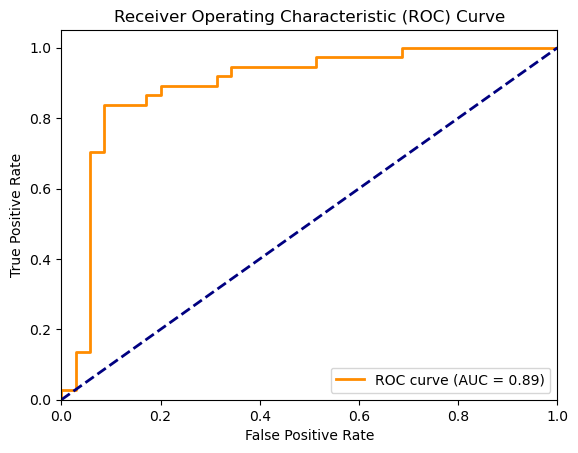

혼동 행렬:
[[32  3]
 [ 9 28]]
분류 보고서:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        35
           1       0.90      0.76      0.82        37

    accuracy                           0.83        72
   macro avg       0.84      0.84      0.83        72
weighted avg       0.84      0.83      0.83        72



In [13]:
from sklearn.metrics import roc_curve, auc, recall_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize


y_train = pd.to_numeric(y_train)
y_test = pd.to_numeric(y_test)


y_train = y_train - 1
y_test = y_test - 1

# 최적의 모델 가져오기
best_svm_clf = grid_search.best_estimator_

# 학습 데이터에 최적 모델을 다시 학습
best_svm_clf.fit(X_train, y_train)

# 테스트 데이터로 예측 수행
y_pred = best_svm_clf.predict(X_test)

# ROC 커브를 그리기 위해 결정함수 점수 계산
y_score = best_svm_clf.decision_function(X_test)

# ROC 커브 계산 (이진 분류 기준)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# AUC와 민감도 출력
print("AUC 값: {:.2f}".format(roc_auc))
print("민감도 (Recall): {:.2f}".format(recall_score(y_test, y_pred)))

# ROC 커브 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 혼동 행렬과 추가 성능 지표 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("혼동 행렬:")
print(conf_matrix)

# 분류 보고서 (정밀도, 민감도, F1 점수 등) 출력
print("분류 보고서:")
print(classification_report(y_test, y_pred))


In [16]:
cv_results_df

,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'degree': 2, 'gamma': 'scale', 'ker...",0.791667,0.094097
20,"{'C': 0.1, 'degree': 4, 'gamma': 'auto', 'kern...",0.791667,0.094097
4,"{'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kern...",0.791667,0.094097
16,"{'C': 0.1, 'degree': 4, 'gamma': 'scale', 'ker...",0.791667,0.094097
12,"{'C': 0.1, 'degree': 3, 'gamma': 'auto', 'kern...",0.791667,0.094097
...,...,...,...
90,"{'C': 100, 'degree': 4, 'gamma': 'scale', 'ker...",0.562500,0.089365
70,"{'C': 10, 'degree': 4, 'gamma': 'auto', 'kerne...",0.558333,0.083749
66,"{'C': 10, 'degree': 4, 'gamma': 'scale', 'kern...",0.558333,0.083749
2,"{'C': 0.1, 'degree': 2, 'gamma': 'scale', 'ker...",0.550000,0.080795


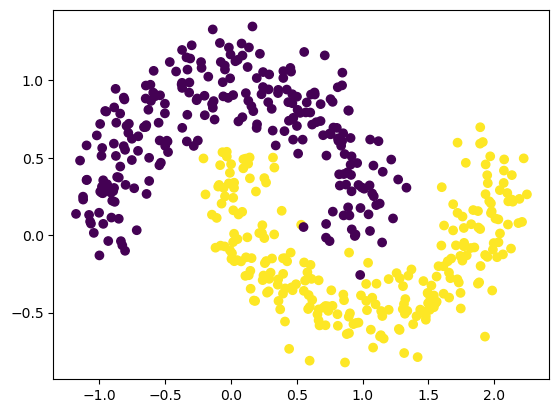

In [62]:
X2, Y2 = d.make_moons(n_samples = 500, noise = 0.16, random_state = 50)

plt.scatter(X2[:, 0], X2[:, 1], c=Y2)
plt.show()


In [8]:
# p_value = 1


# while p_value > 0.0001 :

#     A = np.random.randint(1, 5, size=1000)
#     B = np.random.randint(3, 7, size=1000)
#     C = np.random.randint(10, 15, size=1000)
#     D = np.random.randint(20, 25, size=1000)
#     df = pd.DataFrame({'A': A, 'B': B, 'C': C, 'D': D})
#     df['E'] = np.random.choice(['t', 'f', 'w'], size=1000)
#     df['mean'] = df[['A','B','C','D']].mean(axis=1)
#     # 각 집단으로 나누기 (t, w, f)
#     group_t = df[df['E'] == 't'][['mean']]
#     group_w = df[df['E'] == 'w'][['mean']]
#     group_f = df[df['E'] == 'f'][['mean']]


#     # mean 열에 대한 ANOVA (분산분석) 수행
#     anova_results = {}
#     for column in ['mean']:
#         f_value, p_value = stats.f_oneway(group_t[column], group_w[column], group_f[column])
#         anova_results[column] = {'F-statistic': f_value, 'p-value': p_value}



# # 결과 출력
# anova_results_df = pd.DataFrame(anova_results).T
# print(anova_results_df)

      F-statistic   p-value
mean     9.567136  0.000077


In [9]:
# df

,A,B,C,D,E,mean
0,1,3,13,23,t,10.00
1,2,6,13,21,t,10.50
2,4,3,10,21,w,9.50
3,1,3,11,24,f,9.75
4,1,6,11,24,f,10.50
...,...,...,...,...,...,...
995,2,6,10,21,f,9.75
996,3,5,13,24,t,11.25
997,3,4,12,22,t,10.25
998,1,6,13,22,w,10.50


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [11]:
X = df[['mean']]
y = df['E']

# 라벨 인코딩 (범주형 변수 t, w, f를 숫자로 변환)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# SVM 모델 생성 및 학습
model = SVC(kernel='linear', class_weight='balanced')  # 선형 커널을 사용한 SVM
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0))


Accuracy: 0.37285714285714283

Classification Report:
               precision    recall  f1-score   support

           f       0.36      0.67      0.47       214
           t       0.38      0.49      0.43       240
           w       0.00      0.00      0.00       246

    accuracy                           0.37       700
   macro avg       0.25      0.39      0.30       700
weighted avg       0.24      0.37      0.29       700



In [16]:
from sklearn.model_selection import GridSearchCV

# SVM 하이퍼파라미터 그리드 설정
param_grid = {
    'C': [0.1, 1, 10, 100],  # 규제 파라미터
    'kernel': ['linear', 'rbf', 'poly'],  # 커널 종류
    'gamma': ['scale', 'auto'],  # rbf/poly 커널의 경우 사용
    'class_weight': ['balanced', None]  # 클래스 가중치
}

# GridSearchCV로 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 확인
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_,zero_division=0))


Best Parameters: {'C': 0.1, 'class_weight': None, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy: 0.37285714285714283

Classification Report:
               precision    recall  f1-score   support

           f       0.36      0.67      0.47       214
           t       0.38      0.49      0.43       240
           w       0.00      0.00      0.00       246

    accuracy                           0.37       700
   macro avg       0.25      0.39      0.30       700
weighted avg       0.24      0.37      0.29       700

